In [1]:
# imports

import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import math
import statistics as st

In [20]:
# parameters

k = 10
mu, sigma = 0, 1
num_pulls = 1000
num_bands = 2000
q = np.random.normal(0,1,(num_bands,k))
target_arms = np.argmax(q,1)
col=['r','g','k','b','y']

In [23]:
# choosen 5 eps
eps = [0,0.01,0.1,0.2,1]

1000


In [21]:
# Epslon greedy

fin_arms_e = []
fin_rwd_e = []

for e in eps:
    pred_arms = []
    pred_rwd = []
    pred_rwd.append(0)
    # pulling each arm once at the begining
    N = np.ones((num_bands,k))
    Q = np.zeros((num_bands,k))
    pred_rwd.append(np.mean(np.random.normal(q,1)))
    
    for p in range(num_pulls-1):
        pull_cnt = 0
        pull_rwd = []
        
        for b in range(num_bands):
            # choosing random arm with eps probability
            if (rd.random() < e):
                arm = rd.randint(0,k-1)
            else :
                arm = np.argmax(Q[b,:])
            rwd = np.random.normal(q[b,arm],1)
            N[b,arm] += 1
            Q[b,arm] = Q[b,arm] + (rwd - Q[b,arm])/N[b,arm]
            if(arm == target_arms[b]):
                pull_cnt += 1
            pull_rwd.append(rwd)
        
        pred_arms.append(pull_cnt*100/num_bands)
        pred_rwd.append(np.mean(pull_rwd))
        
    fin_arms_e.append(pred_arms)
    fin_rwd_e.append(pred_rwd)

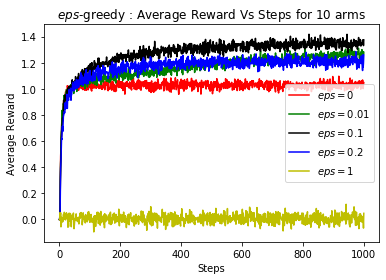

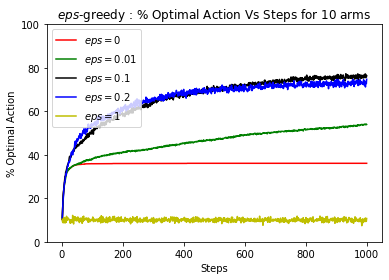

In [4]:
# plot for eps-Greedy

fig1=plt.figure().add_subplot(111)
fig2=plt.figure().add_subplot(111)
for o in range(len(eps)):
    fig1.plot(range(0,num_pulls+1),fin_rwd_e[o],col[o])
    fig2.plot(range(2,num_pulls+1),fin_arms_e[o],col[o])
fig1.title.set_text(r'$eps$-greedy : Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend((r"$eps=$"+str(eps[0]),r"$eps=$"+str(eps[1]),r"$eps=$"+str(eps[2]),r"$eps=$"+str(eps[3]),r"$eps=$"+str(eps[4])),loc='best')
fig2.title.set_text(r'$eps$-greedy : % Optimal Action Vs Steps for 10 arms')
fig2.set_ylabel('% Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r"$eps=$"+str(eps[0]),r"$eps=$"+str(eps[1]),r"$eps=$"+str(eps[2]),r"$eps=$"+str(eps[3]),r"$eps=$"+str(eps[4])),loc='best')
plt.show()

In [22]:
temp = [0.01,1,100]

In [24]:
# Soft-max
# algo testing Epslon greedy

fin_arms_s = []
fin_rwd_s = []

for t in temp:
    print(t)
    pred_arms = []
    pred_rwd = []
    pred_rwd.append(0)
    # pulling each arm once at the begining
    N = np.ones((num_bands,k))
    Q = np.random.normal(q,1)
    pred_rwd.append(np.mean(Q))
    
    for p in range(num_pulls-1):
        pull_cnt = 0
        pull_rwd = []
        
        for b in range(num_bands):
            pr = np.zeros(k)
            tot = 0
            # assigning probabilities to each arm
            for i in range(k):
                pr[i] += math.exp(Q[b,i]/t)
                tot += pr[i]
            pr = pr/tot
            
            tot = pr[0]
            val = rd.random()
            arm = -1
            # sampling and selection
            for i in range(k):
                if(val < tot):
                    arm = i
                    break
                else:
                    tot += pr[i+1]
            
            rwd = np.random.normal(q[b,arm],1)
            N[b,arm] += 1
            Q[b,arm] = Q[b,arm] + (rwd - Q[b,arm])/N[b,arm]
            if(arm == target_arms[b]):
                pull_cnt += 1
            pull_rwd.append(rwd)
        
        pred_arms.append(pull_cnt*100/num_bands)
        pred_rwd.append(np.mean(pull_rwd))
        
    fin_arms_s.append(pred_arms)
    fin_rwd_s.append(pred_rwd)

0.01


KeyboardInterrupt: 

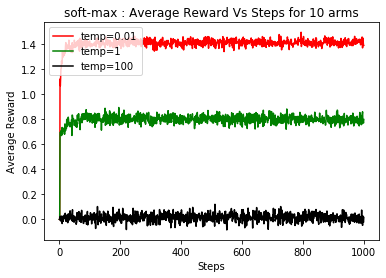

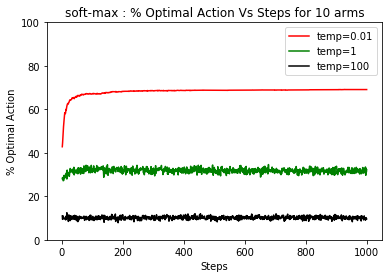

In [7]:
fig1=plt.figure().add_subplot(111)
fig2=plt.figure().add_subplot(111)
for o in range(len(temp)):
    fig1.plot(range(0,num_pulls+1),fin_rwd_s[o],col[o])
    fig2.plot(range(2,num_pulls+1),fin_arms_s[o],col[o])
    
fig1.title.set_text('soft-max : Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend(("temp="+str(temp[0]),r"temp="+str(temp[1]),r"temp="+str(temp[2])),loc='best')
fig2.title.set_text('soft-max : % Optimal Action Vs Steps for 10 arms')
fig2.set_ylabel('% Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend(("temp="+str(temp[0]),r"temp="+str(temp[1]),r"temp="+str(temp[2])),loc='best')
plt.show()

In [6]:
# UCB1

fin_arms_u = []
fin_rwd_u = []

for x in range(1):
    pred_arms = []
    pred_rwd = []
    pred_rwd.append(0)
    # pulling each arm once at the begining
    N = np.ones((num_bands,k))
    Q = np.random.normal(q,1)
    pred_rwd.append(np.mean(Q))
    
    for p in range(num_pulls-1):
        pull_cnt = 0
        pull_rwd = []
        
        for b in range(num_bands):
            
            val = np.zeros(k)
            tot = np.sum(N[b,:])
            for i in range(k):
                val[i] += Q[b,i] + math.sqrt((2*math.log(tot))/N[b,i])
                
            arm = np.argmax(val)
            rwd = np.random.normal(q[b,arm],1)
            N[b,arm] += 1
            Q[b,arm] = Q[b,arm] + (rwd - Q[b,arm])/N[b,arm]
            if(arm == target_arms[b]):
                pull_cnt += 1
            pull_rwd.append(rwd)
        
        pred_arms.append(pull_cnt*100/num_bands)
        pred_rwd.append(np.mean(pull_rwd))
        
    fin_arms_u.append(pred_arms)
    fin_rwd_u.append(pred_rwd)

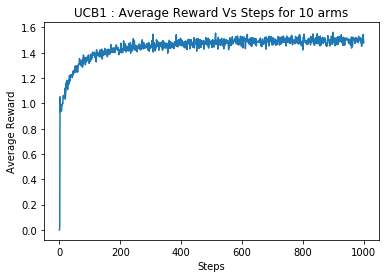

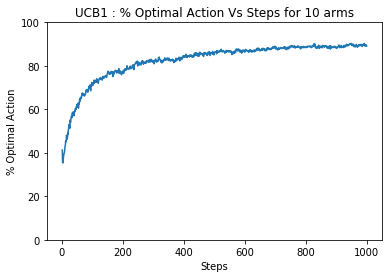

In [9]:
fig1=plt.figure().add_subplot(111)
fig2=plt.figure().add_subplot(111)

fig1.plot(range(0,num_pulls+1),fin_rwd_u[0])
fig2.plot(range(2,num_pulls+1),fin_arms_u[0])
    
fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig2.title.set_text('UCB1 : % Optimal Action Vs Steps for 10 arms')
fig2.set_ylabel('% Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
plt.show()

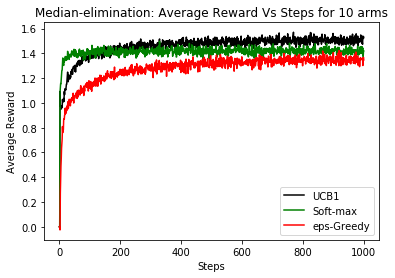

In [8]:
# comparision plots
fig1=plt.figure().add_subplot(111)
fig1.plot(fin_rwd_u[0],col[2])
fig1.plot(fin_rwd_s[0],col[1])
fig1.plot(fin_rwd_e[2],col[0])
fig1.title.set_text('Median-elimination: Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend(("UCB1","Soft-max","eps-Greedy"),loc='best')
plt.show()

In [9]:
ep = 0.5
dl = 0.3
num_bands = 200

In [10]:
# median elimination algo.
S = [set(range(k)) for i in range(num_bands)]
epl = np.full(num_bands,ep/4)
dlt = np.full(num_bands,dl/2)
Q = np.zeros((num_bands,k))
step = np.zeros(num_bands)
pull_cnt = [[] for i in range(num_bands)]
pull_rwd = [[] for i in range(num_bands)]
for b in range(num_bands):
    print(b)
    w_cnt = 0
    while(True):
        w_cnt += 1
        ll = int((4/(epl[b]*epl[b]))*(math.log(3/dlt[b])))
        # pull each arm ll times
        for arm in S[b]:
            for i in range(ll):
                rwd = np.random.normal(q[b,arm],1)
                N[b,arm] += 1
                Q[b,arm] = Q[b,arm] + (rwd - Q[b,arm])/N[b,arm]
                if(arm == target_arms[b]):
                    pull_cnt[b].append(1)
                else:
                    pull_cnt[b].append(0)
                pull_rwd[b].append(rwd)
                step[b] += 1



        Ql = []
        for i in S[b]:
            Ql.append(Q[b,i])
        ml = st.median(Ql)
        Sn = set()
        for a in S[b]:
            if(Q[b,a] >= ml):
                Sn.add(a)
        S[b] = Sn
        epl[b] = 3*epl[b]/4
        dlt[b] = dlt[b]/2
        if(len(S[b]) == 1):
            for arm in S[b]:
                if(arm == target_arms[b]):
                    pull_cnt[b].append(1)
                else:
                    pull_cnt[b].append(0)
                pull_rwd[b].append(np.random.normal(q[b,arm],1))
            break


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [12]:
avg_pull_53 = np.mean(pull_cnt,0)
avg_rwd_53 = np.mean(pull_rwd,0)
avg_pull_53 = avg_pull_53*100
print(step[0])
print(w_cnt)

41285.0
4


In [13]:
ep = 0.2
dl = 0.1
num_bands = 100

# median elimination algo.
S = [set(range(k)) for i in range(num_bands)]
epl = np.full(num_bands,ep/4)
dlt = np.full(num_bands,dl/2)
Q = np.zeros((num_bands,k))
step = np.zeros(num_bands)
pull_cnt = [[] for i in range(num_bands)]
pull_rwd = [[] for i in range(num_bands)]
for b in range(num_bands):
    print(b)
    w_cnt = 0
    while(True):
        w_cnt += 1
        ll = int((4/(epl[b]*epl[b]))*(math.log(3/dlt[b])))
        # pull each arm ll times
        for arm in S[b]:
            for i in range(ll):
                rwd = np.random.normal(q[b,arm],1)
                N[b,arm] += 1
                Q[b,arm] = Q[b,arm] + (rwd - Q[b,arm])/N[b,arm]
                if(arm == target_arms[b]):
                    pull_cnt[b].append(1)
                else:
                    pull_cnt[b].append(0)
                pull_rwd[b].append(rwd)
                step[b] += 1



        Ql = []
        for i in S[b]:
            Ql.append(Q[b,i])
        ml = st.median(Ql)
        Sn = set()
        for a in S[b]:
            if(Q[b,a] >= ml):
                Sn.add(a)
        S[b] = Sn
        epl[b] = 3*epl[b]/4
        dlt[b] = dlt[b]/2
        if(len(S[b]) == 1):
            for arm in S[b]:
                if(arm == target_arms[b]):
                    pull_cnt[b].append(1)
                else:
                    pull_cnt[b].append(0)
                pull_rwd[b].append(np.random.normal(q[b,arm],1))
            break

            
avg_pull_21 = np.mean(pull_cnt,0)
avg_rwd_21 = np.mean(pull_rwd,0)
print(step[0])
print(w_cnt)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


NameError: name 'avg_pull' is not defined

array([-0.09953677, -0.0111834 ,  0.03613871, ...,  1.32161683,
        1.30414561,  1.48853014])

In [16]:
ep = 0.1
dl = 0.1
num_bands = 50

# median elimination algo.
S = [set(range(k)) for i in range(num_bands)]
epl = np.full(num_bands,ep/4)
dlt = np.full(num_bands,dl/2)
Q = np.zeros((num_bands,k))
step = np.zeros(num_bands)
pull_cnt = [[] for i in range(num_bands)]
pull_rwd = [[] for i in range(num_bands)]
for b in range(num_bands):
    print(b)
    w_cnt = 0
    while(True):
        w_cnt += 1
        ll = int((4/(epl[b]*epl[b]))*(math.log(3/dlt[b])))
        # pull each arm ll times
        for arm in S[b]:
            for i in range(ll):
                rwd = np.random.normal(q[b,arm],1)
                N[b,arm] += 1
                Q[b,arm] = Q[b,arm] + (rwd - Q[b,arm])/N[b,arm]
                if(arm == target_arms[b]):
                    pull_cnt[b].append(1)
                else:
                    pull_cnt[b].append(0)
                pull_rwd[b].append(rwd)
                step[b] += 1



        Ql = []
        for i in S[b]:
            Ql.append(Q[b,i])
        ml = st.median(Ql)
        Sn = set()
        for a in S[b]:
            if(Q[b,a] >= ml):
                Sn.add(a)
        S[b] = Sn
        epl[b] = 3*epl[b]/4
        dlt[b] = dlt[b]/2
        if(len(S[b]) == 1):
            for arm in S[b]:
                if(arm == target_arms[b]):
                    pull_cnt[b].append(1)
                else:
                    pull_cnt[b].append(0)
                pull_rwd[b].append(np.random.normal(q[b,arm],1))
            break

            
avg_pull_11 = np.mean(pull_cnt,0)
avg_rwd_11 = np.mean(pull_rwd,0)
print(step[0])
print(w_cnt)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
1310966.0
4


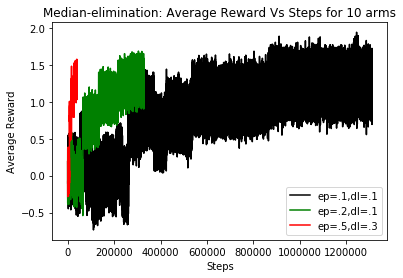

In [17]:
fig1=plt.figure().add_subplot(111)
fig1.plot(avg_rwd_11,col[2])
fig1.plot(avg_rwd_21,col[1])
fig1.plot(avg_rwd_53,col[0])
fig1.title.set_text('Median-elimination: Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend(("ep=.1,dl=.1","ep=.2,dl=.1","ep=.5,dl=.3"),loc='best')
plt.show()

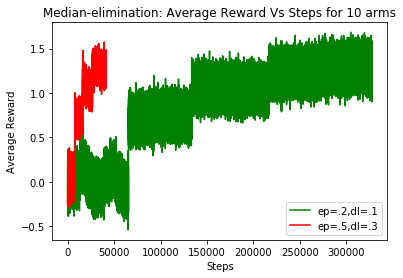

In [18]:
fig1=plt.figure().add_subplot(111)
fig1.plot(avg_rwd_21,col[1])
fig1.plot(avg_rwd_53,col[0])
fig1.title.set_text('Median-elimination: Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend(("ep=.2,dl=.1","ep=.5,dl=.3"),loc='best')
plt.show()

In [ ]:
# learning bandit

eps = 0.1

Q = np.zeros(k)
N = np.zeros(k)

for i in range(1000):
    if (rd.random() < eps):
        act = rd.randint(0,9)
    else :
        act = np.argmax(Q)
    N[act] += 1
    Q[act] = Q[act] + (bandit(act) - Q[act])/N[act]
    
print(Q)

In [ ]:
l = np.random.normal(0,1,k)
pr = np.zeros(k)
tot = 0
for i in range(k):
    pr[i] += math.exp(l[i])
    tot += pr[i]
pr = pr/tot

In [19]:
p = set([1,2,3,4])


TypeError: 'set' object is not subscriptable